In [3]:
# Importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Activation,Reshape, Input, ReLU, Concatenate, Conv2D,MaxPooling2D, UpSampling2D, BatchNormalization, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# Loading CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
# Normalizing inputs
x_train = x_train/255
x_test = x_test/255

In [6]:
# Noise (normal distribution) addition function
def noise_addition(image, mean, std):
    noise = np.random.normal(loc=mean, scale=std, size=image.shape)
    image = image + noise
    image = np.clip(image, 0., 1.)
    return image    

In [7]:
# 3 different noise levels
noisy_x_train_1 = noise_addition(x_train, 0.0, 0.1)
noisy_x_test_1 = noise_addition(x_test, 0.0, 0.1)

noisy_x_train_2 = noise_addition(x_train, 0.0, 0.3)
noisy_x_test_2 = noise_addition(x_test, 0.0, 0.3)

noisy_x_train_3 = noise_addition(x_train, 0.2, 0.2)
noisy_x_test_3 = noise_addition(x_test, 0.2, 0.2)

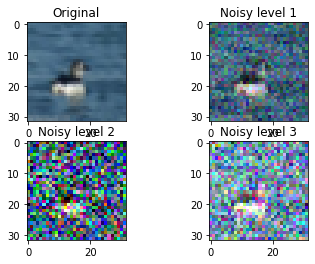

In [8]:
# Displaying original and noisy image (all 3 levels) from the dataset
index = 47
plt.subplot(2, 2, 1)
plt.imshow(x_train[index])
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(noisy_x_train_1[index])
plt.title('Noisy level 1')

plt.subplot(2, 2, 3)
plt.imshow(noisy_x_train_2[index])
plt.title('Noisy level 2')

plt.subplot(2, 2, 4)
plt.imshow(noisy_x_train_3[index])
plt.title('Noisy level 3')
plt.show()

In [11]:
# Encoder and Decoder definations
def encoder(x, filters, kernel_size, strides=2):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

def decoder(x, filters, kernel_size):
    x = Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

In [12]:
def autoencoder():
    autoencoder_inputs = Input(shape=(32, 32, 3), name='autoencoder_inputs')
    conv1 = encoder(autoencoder_inputs, 32, 3)
    conv2 = encoder(conv1, 64, 3)
    conv3 = encoder(conv2, 128, 3)
    conv4 = encoder(conv3, 256, 3)
    conv5 = encoder(conv4, 256, 3, 1)

    deconv1 = decoder(conv5, 256, 3)
    concat1 = Concatenate()([deconv1, conv3])
    deconv2 = decoder(concat1, 128, 3)
    concat2 = Concatenate()([deconv2, conv2])
    deconv3 = decoder(concat2, 64, 3)
    concat3 = Concatenate()([deconv3, conv1])
    deconv4 = decoder(concat3, 32, 3)

    last_decoder = Conv2DTranspose(filters=3, kernel_size=3, padding='same')(deconv4)

    autoencoder_outputs = Activation('sigmoid', name='autoencoder_outputs')(last_decoder)

    return Model(autoencoder_inputs, autoencoder_outputs, name='autoencoder')

In [13]:
denoiser_1 = autoencoder()
denoiser_1.summary()
denoiser_1.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('best_model_noise_1.h5', verbose=1, save_best_only=True, save_weights_only=True)

denoiser_1.fit(noisy_x_train_1, x_train, validation_data=(noisy_x_test_1, x_test), epochs=10, batch_size=128, callbacks=[checkpoint])

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
autoencoder_inputs (InputLayer) [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 32)   896         autoencoder_inputs[0][0]         
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 16, 16, 32)   0           batch_normalization[0][0]        
________________________________________________________________________________________

In [14]:
denoiser_2 = autoencoder()
denoiser_2.summary()
denoiser_2.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('best_model_noise_2.h5', verbose=1, save_best_only=True, save_weights_only=True)

denoiser_2.fit(noisy_x_train_2, x_train, validation_data=(noisy_x_test_2, x_test), epochs=10, batch_size=128, callbacks=[checkpoint])

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
autoencoder_inputs (InputLayer) [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 16, 16, 32)   896         autoencoder_inputs[0][0]         
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 16, 16, 32)   128         conv2d_5[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 16, 16, 32)   0           batch_normalization_9[0][0]      
________________________________________________________________________________________

In [15]:
denoiser_3 = autoencoder()
denoiser_3.summary()

denoiser_3.compile(loss='mse', optimizer='adam')

checkpoint = ModelCheckpoint('best_model_noise_3.h5', verbose=1, save_best_only=True, save_weights_only=True)

denoiser_3.fit(noisy_x_train_3, x_train, validation_data=(noisy_x_test_3, x_test), epochs=10, batch_size=128, callbacks=[checkpoint])

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
autoencoder_inputs (InputLayer) [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 16, 16, 32)   896         autoencoder_inputs[0][0]         
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 16, 16, 32)   128         conv2d_10[0][0]                  
__________________________________________________________________________________________________
re_lu_18 (ReLU)                 (None, 16, 16, 32)   0           batch_normalization_18[0][0]     
________________________________________________________________________________________

In [16]:
denoiser_1.load_weights('D:/GitHub/Denoising-Algorithm-on-CIFAR10-dataset/Best models/best_model_noise_1.h5')
denoised_x_test_1 = denoiser_1.predict(noisy_x_test_1)

denoiser_2.load_weights('D:/GitHub/Denoising-Algorithm-on-CIFAR10-dataset/Best models/best_model_noise_1.h5')
denoised_x_test_2 = denoiser_2.predict(noisy_x_test_2)

denoiser_3.load_weights('best_model_noise_3.h5')
denoised_x_test_3 = denoiser_3.predict(noisy_x_test_3)

In [17]:
def visualize_results(index, x_test, noisy_x_test, denoised_x_test):
    plt.subplot(1, 3, 1)
    plt.imshow(x_test[index])
    plt.title('original')
    plt.subplot(1, 3, 2)
    plt.imshow(noisy_x_test[index])
    plt.title('noise')
    plt.subplot(1, 3, 3)
    plt.imshow(denoised_x_test[index])
    plt.title('denoised')

    plt.show()

    mse_noise = np.square(np.subtract(x_test, noisy_x_test)).mean()
    mse_denoised = np.square(np.subtract(x_test, denoised_x_test)).mean()
    percentage_denoised = 100*(mse_noise-mse_denoised)/mse_noise
    print(mse_noise)
    print(mse_denoised)
    print(percentage_denoised)
    return

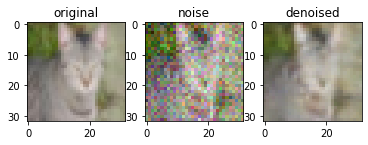

0.00930382631406906
0.0018100136412473418
80.54549192830184


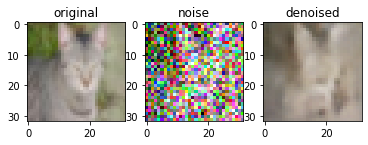

0.06421314166463762
0.0053879827039814265
91.60922115893202


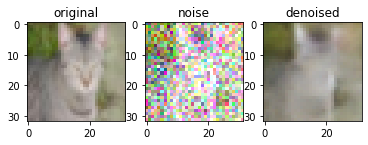

0.0628609287687113
0.003737713527925411
94.05399569949428


In [18]:
index = 320
visualize_results(index, x_test, noisy_x_test_1, denoised_x_test_1)
visualize_results(index, x_test, noisy_x_test_2, denoised_x_test_2)
visualize_results(index, x_test, noisy_x_test_3, denoised_x_test_3)